In [36]:
import nltk, gensim, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

In [3]:
#Instantiate DataFrame of craigslist data
raw_data = pd.read_csv('data\\CRAIGSLIST.Listings-1.csv')

In [4]:
raw_data.head()

,LISTING_ID,LISTING_MONTH,LISTING_DAY,LISTING_TIME,RETRIEVED_ON,BODY,PRICE,AREA_SQFT,ALLOWS_CATS,ALLOWS_DOGS,ADDRESS,LOCATION,CT_ID_10
0,7075241085,February,14,17:08:48,2020-04-28T07:46:54+00:00,Big 4 Bedroom Fully Renovated off Shrewsbury S...,1550,NaN,1.0,1.0,(google map),Worcester -- Shrewsbury STREET,25027730402
1,7075306172,February,14,18:27:59,2020-04-28T05:02:33+00:00,PROPERTY INFO ID: 32252124Rent: 2275 / MonthBe...,2275,900.0,1.0,0.0,South St near Arbor Way,Jamaica Plain,25025981000
2,7075321793,February,14,18:46:53,2020-04-28T21:43:02+00:00,PROPERTY INFO ID: 1281339Rent: 2350 / MonthBed...,2350,800.0,1.0,0.0,Commonwealth Ave near Brighton Ave.,Allston,25025000703
3,7075365895,February,14,19:43:07,2020-04-28T02:11:10+00:00,PROPERTY INFO ID: 32252343Rent: 2350 / MonthBe...,2350,NaN,1.0,0.0,Commonwealth Ave near Gorham st,Allston,25025000704
4,7075367288,February,14,19:45:02,2020-04-28T17:12:47+00:00,PROPERTY INFO ID: 32252343Rent: 2350 / MonthBe...,2350,NaN,1.0,0.0,Commonwealth Ave near Gorham st,Allston,25025000704


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134854 entries, 0 to 134853
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LISTING_ID     134854 non-null  int64  
 1   LISTING_MONTH  134854 non-null  object 
 2   LISTING_DAY    134854 non-null  int64  
 3   LISTING_TIME   134854 non-null  object 
 4   RETRIEVED_ON   134854 non-null  object 
 5   BODY           134854 non-null  object 
 6   PRICE          134854 non-null  int64  
 7   AREA_SQFT      54472 non-null   float64
 8   ALLOWS_CATS    132295 non-null  float64
 9   ALLOWS_DOGS    132295 non-null  float64
 10  ADDRESS        100943 non-null  object 
 11  LOCATION       114446 non-null  object 
 12  CT_ID_10       134854 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 13.4+ MB


In [6]:
raw_data.RETRIEVED_ON.min()

'2020-04-26T19:18:00+00:00'

In [7]:
raw_data.RETRIEVED_ON.max()

'2021-01-18T17:21:54+00:00'

### The dataset includes listings that were active on the site from 04/26/2020 through 01/18/2020

In [8]:
 raw_data.BODY[0]

'Big 4 Bedroom Fully Renovated off Shrewsbury Street w/ 4 Large Bedrooms, Modern Eat-in kitchen, Luxury Tiled Bathrooms, Washer/dryer Hookups, Very Efficient Gas Heat, High Ceilings, Walk-in Closets & New Flooring!! PLEASE CONTACT PAUL LATINO OF RE/MAX ADVANTAGE show contact info !!'

### The 'BODY' column will be the focus of this phase of the project

In [46]:
count_vectorizer = CountVectorizer(stop_words = 'english')

In [47]:
count_data = count_vectorizer.fit_transform(raw_data.BODY)

In [48]:
count_data.shape

(134854, 71414)

In [49]:
count_df = pd.DataFrame(count_data.sum(axis = 0)).T

In [50]:
count_df.index = count_vectorizer.get_feature_names()

In [51]:
count_df.head(25)

,0
00,20223
000,4480
0001,1
0002,2
0004,3
0005,13
0006,248
0008,1
000beds,7
000deposit,1


In [72]:
count_df.columns = ['Count']
sorted_word_count = count_df.sort_values(by = 'Count', ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

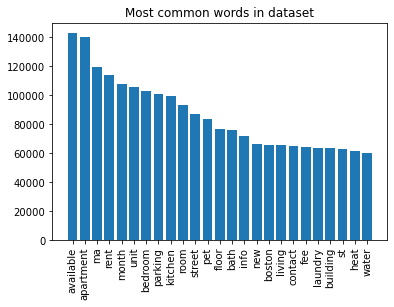

In [78]:
plt.bar(sorted_word_count[:25].index, sorted_word_count[:25].Count)
plt.xticks(rotation = 90)
plt.title('Most common words in dataset')
plt.show

In [62]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

In [63]:
count_vectorizer = CountVectorizer(stop_words = 'english', preprocessor = preprocess_text)
count_data = count_vectorizer.fit_transform(raw_data.BODY)

In [64]:
count_df = pd.DataFrame(count_data.sum(axis = 0)).T
count_df.index = count_vectorizer.get_feature_names()
count_df.head(25)

,0
__,12
___,29
____,132
_____,28
______,6
_______,75
________,8
_________,33
__________,2
___________,70


In [65]:
count_data.shape

(134854, 44821)

In [59]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df = 2, max_df = 0.7)
tfidf_data = tfidf_vectorizer.fit_transform(raw_data.BODY)
tfidf_data.shape

(134854, 39952)

In [60]:
tfidf_data

<134854x39952 sparse matrix of type '<class 'numpy.float64'>'
	with 11297731 stored elements in Compressed Sparse Row format>